In [1]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

<br>

##   hw6pr2digits_modeler
+ digits clasification via decision trees and random forests...
+ Remember: feel free to re-use the cleaned data from previous weeks (already here)


In [ ]:
#
# SUGGESTION:
#
# +++ copy-paste-and-alter from the week6 iris- + births-modeling notebooks into here +++
#
# when the data is ready to view, you might want to grab
# the digits-visualization code
#

## Data set up...
+ Use the cleaned data from prior weeks (it should be here in this folder as digits_cleaned.csv)
+ (I don't think there's too much more to adjust, data-wise...)
+ Next, let's see how well the DT/RF techniques can predict the digit, based on its 64 pixels...

In [2]:
filename = 'digits_cleaned.csv'
df_tidy = pd.read_csv(filename)      # encoding = "utf-8", "latin1"
print(f"{filename} : file read into a pandas dataframe.")

digits_cleaned.csv : file read into a pandas dataframe.


In [4]:
df_tidy

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit
0,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
1,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9
2,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
4,0,0,5,12,1,0,0,0,0,0,...,2,0,0,3,11,8,13,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [5]:
df_model1 = df_tidy

## First: &nbsp; _Decision Trees_

In [25]:
##
# once we have all the columns we want, let's create an index of their names...

#
# Let's make sure we have all of our helpful variables in one place
#       To be adapted if we drop/add more columns...
#

#
# let's keep our column names in variables, for reference
#
COLUMNS = df_model1.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}\n\n")

#
# Feature names!
#
FEATURES = COLUMNS[0:64]
print(FEATURES)
#
# and our "species" names
#

# all of scikit-learn's ML routines need numbers, not strings
#   ... even for categories/classifications (like species!)
#   so, we will convert the flower-species to numbers:

DIGITS = ['0','1','2','3','4','5','6','7','8','9']   # int to str this is not right lol but i think it fine
DIGITS_INDEX = {'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9}  # str to int
DIGITS = [ str(x) for x in DIGITS ]

# Let's try it out...
for name in DIGITS:
    print(f"{name} maps to {DIGITS_INDEX[name]}")

COLUMNS is Index(['pix0', 'pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8',
       'pix9', 'pix10', 'pix11', 'pix12', 'pix13', 'pix14', 'pix15', 'pix16',
       'pix17', 'pix18', 'pix19', 'pix20', 'pix21', 'pix22', 'pix23', 'pix24',
       'pix25', 'pix26', 'pix27', 'pix28', 'pix29', 'pix30', 'pix31', 'pix32',
       'pix33', 'pix34', 'pix35', 'pix36', 'pix37', 'pix38', 'pix39', 'pix40',
       'pix41', 'pix42', 'pix43', 'pix44', 'pix45', 'pix46', 'pix47', 'pix48',
       'pix49', 'pix50', 'pix51', 'pix52', 'pix53', 'pix54', 'pix55', 'pix56',
       'pix57', 'pix58', 'pix59', 'pix60', 'pix61', 'pix62', 'pix63',
       'actual_digit'],
      dtype='object')

COLUMNS[0] is pix0

COL_INDEX is {'pix0': 0, 'pix1': 1, 'pix2': 2, 'pix3': 3, 'pix4': 4, 'pix5': 5, 'pix6': 6, 'pix7': 7, 'pix8': 8, 'pix9': 9, 'pix10': 10, 'pix11': 11, 'pix12': 12, 'pix13': 13, 'pix14': 14, 'pix15': 15, 'pix16': 16, 'pix17': 17, 'pix18': 18, 'pix19': 19, 'pix20': 20, 'pix21': 21, 'pix22': 22, 'pix23'

In [8]:
# let's convert our dataframe to a numpy array, named A
#

A = df_model1.to_numpy()
print(A)


[[ 0  0  9 ...  1  0  8]
 [ 0  0 11 ...  0  0  9]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  1 ...  0  0  8]
 [ 0  0  2 ...  0  0  9]
 [ 0  0 10 ...  1  0  8]]


In [9]:
#
# let's make sure it's all floating-point (here, it already is, but in other datasets it might not be)
#
A = A.astype('float64')  # so many:  www.tutorialspoint.com/numpy/numpy_data_types.htm
print(A)

[[ 0.  0.  9. ...  1.  0.  8.]
 [ 0.  0. 11. ...  0.  0.  9.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  1. ...  0.  0.  8.]
 [ 0.  0.  2. ...  0.  0.  9.]
 [ 0.  0. 10. ...  1.  0.  8.]]


In [10]:
#
# nice to have NUM_ROWS and NUM_COLS around
#
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")


The dataset has 1768 rows and 65 cols


In [26]:
# let's use all our variables, to reinforce that we have
# (1) their names...
# (2) access and control over each...

# choose a row index, n:
n = 42
print(f"digit #{n} is {A[n]}")

for i in range(len(COLUMNS)):
    colname = COLUMNS[i]
    value = A[n][i]
    print(f"  Its {colname} is {value}")

digits_index = COL_INDEX['actual_digit']
digits_num = int(round(A[n][digits_index]))
print(digits_num)
digits = DIGITS[digits_num]
print(f"  Its digit is {digits} (i.e., {digits_num})")

digit #42 is [ 0.  0.  0. 10. 11.  0.  0.  0.  0.  0.  9. 16.  6.  0.  0.  0.  0.  0.
 15. 13.  0.  0.  0.  0.  0.  0. 14. 10.  0.  0.  0.  0.  0.  1. 15. 12.
  8.  2.  0.  0.  0.  0. 12. 16. 16. 16. 10.  1.  0.  0.  7. 16. 12. 12.
 16.  4.  0.  0.  0.  9. 15. 12.  5.  0.  6.]
  Its pix0 is 0.0
  Its pix1 is 0.0
  Its pix2 is 0.0
  Its pix3 is 10.0
  Its pix4 is 11.0
  Its pix5 is 0.0
  Its pix6 is 0.0
  Its pix7 is 0.0
  Its pix8 is 0.0
  Its pix9 is 0.0
  Its pix10 is 9.0
  Its pix11 is 16.0
  Its pix12 is 6.0
  Its pix13 is 0.0
  Its pix14 is 0.0
  Its pix15 is 0.0
  Its pix16 is 0.0
  Its pix17 is 0.0
  Its pix18 is 15.0
  Its pix19 is 13.0
  Its pix20 is 0.0
  Its pix21 is 0.0
  Its pix22 is 0.0
  Its pix23 is 0.0
  Its pix24 is 0.0
  Its pix25 is 0.0
  Its pix26 is 14.0
  Its pix27 is 10.0
  Its pix28 is 0.0
  Its pix29 is 0.0
  Its pix30 is 0.0
  Its pix31 is 0.0
  Its pix32 is 0.0
  Its pix33 is 1.0
  Its pix34 is 15.0
  Its pix35 is 12.0
  Its pix36 is 8.0
  Its pix37 is 2.0
 

In [34]:
A

array([[ 0.,  0.,  9., ...,  1.,  0.,  8.],
       [ 0.,  0., 11., ...,  0.,  0.,  9.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  0.,  0.,  8.],
       [ 0.,  0.,  2., ...,  0.,  0.,  9.],
       [ 0.,  0., 10., ...,  1.,  0.,  8.]])

In [40]:
print("+++ Start of data definitions +++\n")

#
# we could do this at the data-frame level, too!
#

X_all = A[:,0:64]  # X (features) ... is all rows, columns 0, 1, 2, 3
y_all = A[:,64]    # y (labels) ... is all rows, column 4 only

print(f"y_all (just the labels/species)   are \n {y_all}")
print(f"X_all (just the features, first few rows) are \n {X_all[0:5]}")

+++ Start of data definitions +++

y_all (just the labels/species)   are 
 [8. 9. 0. ... 8. 9. 8.]
X_all (just the features, first few rows) are 
 [[ 0.  0.  9. 14.  8.  1.  0.  0.  0.  0. 12. 14. 14. 12.  0.  0.  0.  0.
   9. 10.  0. 15.  4.  0.  0.  0.  3. 16. 12. 14.  2.  0.  0.  0.  4. 16.
  16.  2.  0.  0.  0.  3. 16.  8. 10. 13.  2.  0.  0.  1. 15.  1.  3. 16.
   8.  0.  0.  0. 11. 16. 15. 11.  1.  0.]
 [ 0.  0. 11. 12.  0.  0.  0.  0.  0.  2. 16. 16. 16. 13.  0.  0.  0.  3.
  16. 12. 10. 14.  0.  0.  0.  1. 16.  1. 12. 15.  0.  0.  0.  0. 13. 16.
   9. 15.  2.  0.  0.  0.  0.  3.  0.  9. 11.  0.  0.  0.  0.  0.  9. 15.
   4.  0.  0.  0.  9. 12. 13.  3.  0.  0.]
 [ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
  16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
   0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.  0.  0. 12. 12. 10. 10.
   0.  0.  0.  0.  1. 10. 13.  3.  0.  0.]
 [ 0.  0.  0.  0. 14. 13.  1.  0.  0.  0.  0.  5. 16. 16. 

In [41]:
#
# we scramble the data, to remove (potential) dependence on its ordering:
#
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_permed = X_all[indices]              # we apply the _same_ permutation to each!
y_permed = y_all[indices]              # again...
print(f"The scrambled labels/species are \n {y_permed}")
print(f"The corresponding data rows are \n {X_permed[0:5]}")

The scrambled labels/species are 
 [4. 8. 4. ... 0. 9. 3.]
The corresponding data rows are 
 [[ 0.  0.  0. 13.  9.  0.  0.  0.  0.  0.  6. 16.  2.  0.  0.  0.  0.  0.
  12.  9.  0.  2.  0.  0.  0.  7. 15.  1.  5. 15.  1.  0.  0. 14. 10.  4.
  11. 12.  3.  0.  2. 16. 16. 16. 16. 13.  2.  0.  0.  3.  4. 11. 14.  0.
   0.  0.  0.  0.  0. 15.  4.  0.  0.  0.]
 [ 0.  0. 11. 16. 16. 14.  0.  0.  0.  1. 16. 15. 13. 15.  1.  0.  0.  0.
  14. 15. 16.  6.  0.  0.  0.  0.  8. 16.  7.  0.  0.  0.  0.  0.  8. 16.
   7.  0.  0.  0.  0.  0. 13. 14. 13.  0.  0.  0.  0.  0. 16. 11. 15.  0.
   0.  0.  0.  0. 12. 16. 10.  0.  0.  0.]
 [ 0.  0.  0. 11.  4.  0.  0.  0.  0.  0.  1. 16.  4.  3.  0.  0.  0.  0.
  10.  9. 16.  4.  0.  0.  0.  2. 14.  5. 16.  2.  0.  0.  0.  8. 13.  7.
  16. 11.  2.  0.  0. 10. 16. 16. 16. 14.  1.  0.  0.  0.  0. 11. 13.  0.
   0.  0.  0.  0.  0. 11.  7.  0.  0.  0.]
 [ 0.  0.  2. 15. 12.  0.  0.  0.  0.  0.  9. 16.  5.  0.  2.  0.  0.  2.
  15. 10.  0. 11. 16.  1.  0. 10. 16. 

In [42]:
#
# We next separate into test data and training data ...
#    + We will train on the training data...
#    + We will _not_ look at the testing data to build the model
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_permed, y_permed, test_size=0.2, random_state=42)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)})")
print(f"y_test: {y_test}\n")
print(f"X_test (few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)})")
print(f"y_train: {y_train}\n")
print(f"X_train (few rows): {X_train[0:5,:]}")  # 5 rows

training with 1414 rows;  testing with 354 rows

Held-out data... (testing data: 354)
y_test: [8. 5. 1. 7. 1. 7. 3. 4. 0. 1. 5. 9. 4. 8. 5. 5. 5. 3. 4. 7. 6. 3. 4. 7.
 5. 1. 6. 4. 7. 6. 4. 9. 8. 0. 9. 2. 7. 4. 6. 1. 9. 6. 7. 7. 6. 5. 5. 4.
 6. 0. 4. 9. 8. 6. 6. 5. 6. 4. 8. 2. 5. 6. 1. 3. 5. 0. 8. 4. 3. 9. 1. 5.
 6. 4. 1. 1. 8. 7. 7. 9. 3. 3. 3. 3. 3. 3. 9. 8. 6. 4. 2. 0. 1. 5. 2. 1.
 4. 9. 2. 0. 8. 9. 1. 1. 1. 2. 9. 4. 4. 1. 3. 6. 2. 2. 5. 0. 6. 2. 6. 8.
 0. 2. 9. 6. 3. 3. 7. 1. 8. 7. 6. 6. 0. 0. 0. 5. 6. 9. 0. 8. 0. 5. 4. 0.
 8. 8. 3. 3. 1. 5. 2. 7. 6. 9. 7. 2. 2. 5. 7. 9. 3. 4. 4. 3. 5. 9. 6. 0.
 2. 2. 2. 3. 6. 8. 3. 0. 5. 7. 9. 6. 6. 2. 8. 3. 7. 2. 7. 0. 8. 2. 8. 4.
 7. 0. 8. 7. 5. 1. 4. 9. 4. 6. 9. 7. 4. 5. 7. 9. 1. 3. 5. 8. 3. 4. 0. 6.
 8. 2. 4. 2. 6. 5. 3. 0. 1. 4. 4. 8. 1. 4. 6. 0. 4. 8. 0. 7. 0. 7. 9. 0.
 8. 0. 6. 1. 9. 1. 0. 5. 4. 9. 1. 6. 4. 6. 0. 7. 3. 6. 1. 2. 1. 4. 1. 8.
 8. 8. 1. 9. 3. 3. 9. 6. 0. 1. 6. 4. 2. 6. 1. 9. 9. 1. 4. 8. 6. 8. 4. 1.
 4. 0. 9. 5. 4. 0. 6. 4. 4. 1.

In [47]:
#
# +++ This is the "Model-building and Model-training Cell"
#
# Create a DT model and train it!
#
from sklearn import tree      # for decision trees

best_depth = 5   # we don't know what depth to use, so let's guess 1
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)

# Let's train the model.   It's this one line:
dtree_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth)

Created and trained a DT classifier with max depth = 5


In [49]:
#
# +++ This cell will "Model-testing Cell"
#
# Now, let's see how well our model does on our "held-out data" (the testing data)
#

# We run our test set:

# the function knn_model.predict is the instantiation of our model
# it's what runs the k-nearest-neighbors algorithm:
predicted_labels = dtree_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Predicted labels: [7. 5. 8. 7. 8. 7. 3. 4. 0. 6. 5. 9. 4. 8. 5. 5. 5. 7. 4. 7. 6. 3. 4. 7.
 5. 6. 6. 4. 7. 6. 4. 9. 8. 0. 9. 3. 7. 4. 2. 3. 3. 6. 7. 7. 6. 5. 5. 4.
 6. 0. 4. 3. 8. 6. 6. 5. 1. 4. 8. 8. 5. 6. 8. 7. 5. 0. 8. 4. 3. 9. 1. 5.
 6. 4. 1. 1. 8. 7. 7. 3. 3. 3. 3. 3. 3. 3. 9. 8. 6. 4. 8. 0. 4. 5. 8. 1.
 4. 9. 8. 8. 8. 3. 8. 1. 8. 8. 9. 4. 4. 8. 3. 6. 8. 8. 6. 0. 6. 2. 6. 8.
 0. 8. 3. 6. 3. 3. 7. 4. 8. 7. 6. 6. 0. 0. 0. 3. 6. 6. 0. 8. 0. 5. 4. 0.
 8. 8. 3. 8. 8. 5. 8. 7. 6. 9. 7. 8. 8. 5. 7. 8. 3. 4. 4. 3. 5. 7. 6. 0.
 2. 8. 8. 3. 6. 7. 3. 0. 5. 7. 3. 6. 6. 8. 3. 3. 2. 8. 7. 0. 8. 8. 8. 4.
 6. 0. 8. 7. 5. 6. 4. 9. 4. 4. 3. 8. 4. 5. 7. 3. 2. 8. 5. 8. 3. 4. 1. 6.
 8. 8. 4. 8. 4. 5. 3. 0. 8. 4. 4. 2. 8. 4. 8. 0. 3. 8. 0. 7. 0. 2. 9. 0.
 3. 0. 6. 3. 3. 1. 0. 5. 4. 3. 1. 6. 8. 1. 0. 8. 3. 6. 8. 8. 3. 6. 8. 8.
 8. 9. 8. 4. 3. 3. 9. 6. 0. 3. 6. 4. 8. 6. 3. 9. 9. 2. 4. 8. 6. 8. 7. 2.
 4. 0. 3. 5. 4. 0. 6. 4. 4. 3. 3. 8. 6. 4. 4. 1. 8. 3. 6. 2. 0. 3. 0. 7.
 4. 5. 8. 5. 5. 6. 7. 3. 8. 0. 1.

In [51]:
#
# Let's print these more helpfully, in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0

    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {DIGITS[p]:>12s} {DIGITS[a]:<12s}   {result}")

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!
compare_labels(predicted_labels,actual_labels)

row   0 :            7 8              incorrect
row   1 :            5 5              
row   2 :            8 1              incorrect
row   3 :            7 7              
row   4 :            8 1              incorrect
row   5 :            7 7              
row   6 :            3 3              
row   7 :            4 4              
row   8 :            0 0              
row   9 :            6 1              incorrect
row  10 :            5 5              
row  11 :            9 9              
row  12 :            4 4              
row  13 :            8 8              
row  14 :            5 5              
row  15 :            5 5              
row  16 :            5 5              
row  17 :            7 3              incorrect
row  18 :            4 4              
row  19 :            7 7              
row  20 :            6 6              
row  21 :            3 3              
row  22 :            4 4              
row  23 :            7 7              
row  24 :          

249

In [52]:
#
# first, let's use text :)
#
text_representation = tree.export_text(dtree_model)
print(text_representation)

|--- feature_36 <= 0.50
|   |--- feature_33 <= 0.50
|   |   |--- feature_21 <= 6.00
|   |   |   |--- feature_18 <= 10.50
|   |   |   |   |--- feature_9 <= 3.50
|   |   |   |   |   |--- class: 6.0
|   |   |   |   |--- feature_9 >  3.50
|   |   |   |   |   |--- class: 2.0
|   |   |   |--- feature_18 >  10.50
|   |   |   |   |--- class: 5.0
|   |   |--- feature_21 >  6.00
|   |   |   |--- feature_18 <= 2.00
|   |   |   |   |--- class: 3.0
|   |   |   |--- feature_18 >  2.00
|   |   |   |   |--- class: 9.0
|   |--- feature_33 >  0.50
|   |   |--- feature_6 <= 1.50
|   |   |   |--- feature_13 <= 1.00
|   |   |   |   |--- feature_41 <= 5.50
|   |   |   |   |   |--- class: 6.0
|   |   |   |   |--- feature_41 >  5.50
|   |   |   |   |   |--- class: 4.0
|   |   |   |--- feature_13 >  1.00
|   |   |   |   |--- feature_28 <= 4.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_28 >  4.50
|   |   |   |   |   |--- class: 5.0
|   |   |--- feature_6 >  1.50
|   |   |   |--- class: 5.

In [56]:
print("Number of classes in model:", dtree_model.n_classes_)
print("Your DIGITS list:", DIGITS)

Number of classes in model: 10
Your DIGITS list: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [57]:
#
# Now, let's see the tree!
#

filename = 'c.gv'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model, out_file=filename,  # the filename constructed above...!
                            feature_names=FEATURES,   # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=DIGITS,      # Yay! we created this
                            leaves_parallel=True )    # lots of options!

print(f"# file {filename} written. Try pasting its contents to  http://viz-js.com/")
print()

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

# file c.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="pix36 <= 0.5\ngini = 0.9\nsamples = 1414\nvalue = [137, 143, 146, 149, 131, 146, 136, 147, 135, 144]\nclass = 3", fillcolor="#ffffff"] ;
1 [label="pix33 <= 0.5\ngini = 0.527\nsamples = 207\nvalue = [135, 0, 3, 1, 4, 17, 5, 0, 1, 41]\nclass = 0", fillcolor="#f0b88f"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="pix21 <= 6.0\ngini = 0.442\nsamples = 56\nvalue = [0, 0, 3, 1, 1, 7, 3, 0, 0, 41]\nclass = 9", fillcolor="#ed768b"] ;
1 -> 2 ;
3 [label="pix18 <= 10.5\ngini = 0.653\nsamples = 14\nvalue = [0, 0, 3, 0, 1, 7, 3, 0, 0, 0]\nclass = 5", fillcolor="#b7dbf6"] ;
2 -> 3 ;
4 [label="pix9 <= 3.5\ngini = 0.612\nsamples = 7\nvalue = [0, 0, 3, 0, 1, 0, 3, 0, 0, 0]\nclass = 2", fillcolor="#ffffff"] ;
3 -> 4 ;
5 [label="gini = 0.3

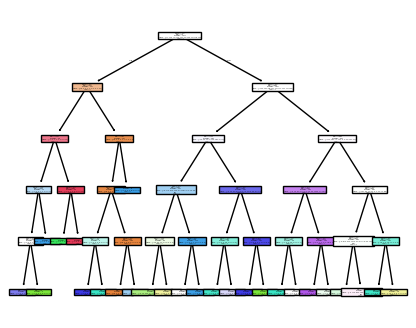

In [59]:
#
# Treeing!
#
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,4))              # Feel free to adjust this size...
tree_plot = tree.plot_tree(dtree_model,
                   feature_names=FEATURES,   # Glad to have these FEATURES...
                   class_names=DIGITS,      # and these SPECIES...
                   filled=True)

In [60]:
#
# To compare different tree-depths, we use cross validation
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

best_d = 1
best_accuracy = 0.0

for d in range(1,10+1):
    cv_model = tree.DecisionTreeClassifier(max_depth=d)   # for each depth, d
    cv_scores = cross_val_score( cv_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
    # print(cv_scores)  # we usually don't want to see the five individual scores
    average_cv_accuracy = cv_scores.mean()  # more likely, only their average
    print(f"depth: {d:2d}  cv accuracy: {average_cv_accuracy:7.4f}")

    if average_cv_accuracy > best_accuracy:
        best_accuracy = average_cv_accuracy
        best_d = d



# assign best value of d to best_depth
best_depth = best_d   # may have to hand-tune this, depending on what happens...
print()
print(f"best_depth = {best_depth} with acc: {best_accuracy} is our balance.")
print()
print("Too deep and the tree will _overfit_ the training data.")
print("Too shallow and the tree will _underfit_ the training data.")

depth:  1  cv accuracy:  0.2001
depth:  2  cv accuracy:  0.3154
depth:  3  cv accuracy:  0.4753
depth:  4  cv accuracy:  0.5615
depth:  5  cv accuracy:  0.6627
depth:  6  cv accuracy:  0.7624
depth:  7  cv accuracy:  0.8147
depth:  8  cv accuracy:  0.8296
depth:  9  cv accuracy:  0.8232
depth: 10  cv accuracy:  0.8402

best_depth = 10 with acc: 0.8401899606545873 is our balance.

Too deep and the tree will _overfit_ the training data.
Too shallow and the tree will _underfit_ the training data.


In [61]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
# this time, with the best depth, best_d, found by cross-validation model tuning:
#
from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_tuned = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth)

Created and trained a DT classifier with max depth = 10


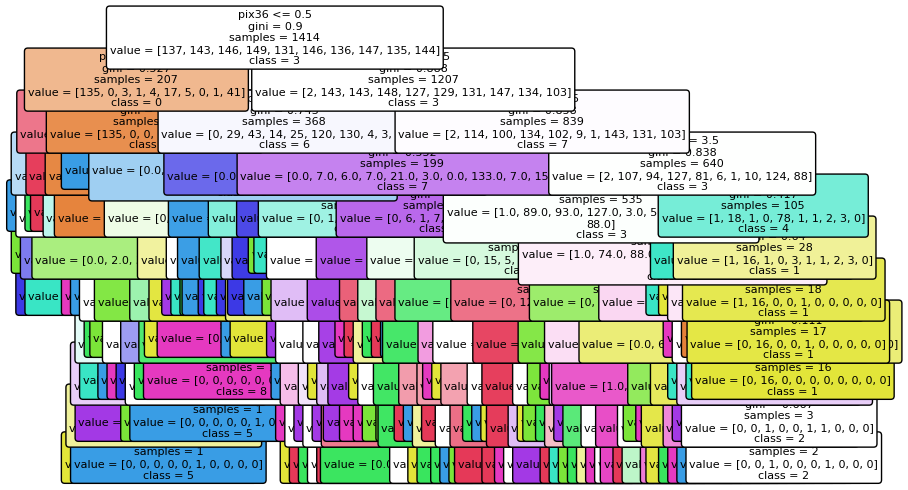

In [64]:
#
# Now, let's see the tree!
#

filename = 'tree_data.gv'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model_tuned, out_file=filename,  # the filename constructed above...!
                            feature_names=FEATURES, # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=DIGITS,      # good to have
                            leaves_parallel=True )    # lots of options!

# Use this line to print the tree to the console in the dot language:
# print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/")

# with open(filename, "r") as f:    # here, it will print to a file:
#     all_file_text = f.read()
#     print(all_file_text)

#
# Treeing using matplotlib:
#
fig = plt.figure(figsize=(9,6))
tree_plot = tree.plot_tree(dtree_model_tuned,
                   feature_names=FEATURES,   # Glad to have these!
                   class_names=DIGITS,      # and these!!
                   filled=True,
                   rounded=True,
                   fontsize=8)

In [65]:
# Its sooooo messy!

#
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
#
predicted_labels = dtree_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)
print()

# and, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 5. 8. 8. 1. 7. 2. 4. 0. 1. 5. 9. 4. 8. 5. 5. 5. 3. 4. 7. 6. 3. 4. 7.
 5. 1. 6. 4. 7. 6. 4. 9. 8. 0. 9. 3. 7. 4. 8. 1. 9. 6. 8. 7. 6. 5. 5. 4.
 6. 0. 4. 9. 8. 6. 6. 5. 2. 4. 2. 2. 5. 6. 1. 7. 5. 0. 2. 4. 3. 9. 2. 5.
 6. 4. 3. 1. 8. 7. 7. 9. 3. 3. 3. 3. 3. 3. 9. 8. 6. 4. 2. 0. 4. 5. 2. 1.
 4. 9. 7. 7. 8. 9. 1. 1. 1. 2. 9. 4. 4. 1. 3. 6. 2. 2. 6. 0. 6. 2. 6. 1.
 0. 2. 9. 6. 3. 9. 7. 4. 8. 7. 6. 6. 0. 0. 0. 1. 6. 5. 0. 2. 0. 5. 4. 0.
 8. 8. 3. 8. 1. 5. 2. 7. 6. 9. 7. 2. 2. 5. 7. 9. 3. 4. 4. 1. 5. 9. 6. 0.
 2. 2. 2. 3. 6. 8. 3. 0. 5. 7. 9. 6. 6. 2. 9. 3. 7. 2. 7. 0. 8. 8. 8. 4.
 1. 0. 8. 7. 7. 1. 4. 9. 4. 1. 9. 3. 4. 5. 7. 9. 8. 2. 5. 8. 3. 4. 0. 6.
 8. 2. 4. 2. 4. 5. 3. 0. 1. 6. 4. 2. 1. 4. 1. 0. 7. 8. 0. 7. 0. 7. 9. 0.
 9. 0. 6. 1. 9. 5. 0. 5. 4. 9. 1. 6. 1. 6. 0. 3. 3. 6. 1. 2. 9. 6. 1. 8.
 9. 9. 1. 4. 3. 9. 9. 6. 0. 1. 6. 4. 2. 6. 1. 9. 9. 2. 4. 8. 6. 8. 7. 2.
 4. 0. 9. 5. 4. 0. 6. 4. 4. 5. 9. 8. 6. 4. 4. 1. 2. 3. 6. 2. 0. 3. 0. 7.
 4. 6. 2. 5. 5. 6. 7. 9. 8. 0. 1.

292

In [74]:
#
# final predictive model (decision trees), with tuned parameters + ALL data incorporated
#

def predictive_model( Features, Model ):
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_digits = Model.predict(our_features)       # The model's prediction!
    predicted_digits = int(round(predicted_digits[0]))  # unpack the extra brackets
    return predicted_digits

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
# Features = [6.7,3.3,5.7,0.1]  # [5.8,2.7,4.1,1.0] [4.6,3.6,3.0,2.2] [6.7,3.3,5.7,2.1]

LoD = [[0,0,0,8,14,0,0,0,0,0,5,16,11,0,0,0,0,1,15,14,1,6,0,0,0,7,16,5,3,16,8,0,0,8,16,8,14,16,2,0,0,0,6,14,16,11,0,0,0,0,0,6,16,4,0,0,0,0,0,10,15,0,0,0],
[0,0,0,5,14,12,2,0,0,0,7,15,8,14,4,0,0,0,6,2,3,13,1,0,0,0,0,1,13,4,0,0,0,0,1,11,9,0,0,0,0,8,16,13,0,0,0,0,0,5,14,16,11,2,0,0,0,0,0,6,12,13,3,0],
[0,0,0,3,16,3,0,0,0,0,0,12,16,2,0,0,0,0,8,16,16,4,0,0,0,7,16,15,16,12,11,0,0,8,16,16,16,13,3,0,0,0,0,7,14,1,0,0,0,0,0,6,16,0,0,0,0,0,0,4,14,0,0,0],
[0,0,0,3,15,10,1,0,0,0,0,11,10,16,4,0,0,0,0,12,1,15,6,0,0,0,0,3,4,15,4,0,0,0,0,6,15,6,0,0,0,4,15,16,9,0,0,0,0,0,13,16,15,9,3,0,0,0,0,4,9,14,7,0],
[0,0,0,3,16,3,0,0,0,0,0,10,16,11,0,0,0,0,4,16,16,8,0,0,0,2,14,12,16,5,0,0,0,10,16,14,16,16,11,0,0,5,12,13,16,8,3,0,0,0,0,2,15,3,0,0,0,0,0,4,12,0,0,0],
[0,0,7,15,15,4,0,0,0,8,16,16,16,4,0,0,0,8,15,8,16,4,0,0,0,0,0,10,15,0,0,0,0,0,1,15,9,0,0,0,0,0,6,16,2,0,0,0,0,0,8,16,8,11,9,0,0,0,9,16,16,12,3,0]]


dtree_model_final = dtree_model_tuned
# run on each one:
for Features in LoD:
    predicted_digits = predictive_model( Features, dtree_model_final )  # pass in the model, too!
    name = DIGITS[predicted_digits]
    print(f"I predict {name} from the features {Features}")    # Answers in the assignment...

I predict 4 from the features [0, 0, 0, 8, 14, 0, 0, 0, 0, 0, 5, 16, 11, 0, 0, 0, 0, 1, 15, 14, 1, 6, 0, 0, 0, 7, 16, 5, 3, 16, 8, 0, 0, 8, 16, 8, 14, 16, 2, 0, 0, 0, 6, 14, 16, 11, 0, 0, 0, 0, 0, 6, 16, 4, 0, 0, 0, 0, 0, 10, 15, 0, 0, 0]
I predict 2 from the features [0, 0, 0, 5, 14, 12, 2, 0, 0, 0, 7, 15, 8, 14, 4, 0, 0, 0, 6, 2, 3, 13, 1, 0, 0, 0, 0, 1, 13, 4, 0, 0, 0, 0, 1, 11, 9, 0, 0, 0, 0, 8, 16, 13, 0, 0, 0, 0, 0, 5, 14, 16, 11, 2, 0, 0, 0, 0, 0, 6, 12, 13, 3, 0]
I predict 4 from the features [0, 0, 0, 3, 16, 3, 0, 0, 0, 0, 0, 12, 16, 2, 0, 0, 0, 0, 8, 16, 16, 4, 0, 0, 0, 7, 16, 15, 16, 12, 11, 0, 0, 8, 16, 16, 16, 13, 3, 0, 0, 0, 0, 7, 14, 1, 0, 0, 0, 0, 0, 6, 16, 0, 0, 0, 0, 0, 0, 4, 14, 0, 0, 0]
I predict 2 from the features [0, 0, 0, 3, 15, 10, 1, 0, 0, 0, 0, 11, 10, 16, 4, 0, 0, 0, 0, 12, 1, 15, 6, 0, 0, 0, 0, 3, 4, 15, 4, 0, 0, 0, 0, 6, 15, 6, 0, 0, 0, 4, 15, 16, 9, 0, 0, 0, 0, 0, 13, 16, 15, 9, 3, 0, 0, 0, 0, 4, 9, 14, 7, 0]
I predict 4 from the features [0, 0, 0, 3, 16,

In [75]:
print(dtree_model_tuned.feature_importances_)
print()

# let's see them with each feature name:
IMPs = dtree_model_tuned.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.         0.         0.00869694 0.01094307 0.00438608 0.07053016
 0.01261181 0.         0.         0.00080725 0.01292249 0.00156285
 0.017199   0.02488536 0.         0.         0.         0.00984088
 0.01228508 0.01288332 0.04318899 0.07935336 0.         0.
 0.         0.00504534 0.01242212 0.05661959 0.0093943  0.05103967
 0.         0.         0.         0.09471617 0.03837411 0.00885467
 0.07357648 0.01136154 0.00476092 0.         0.         0.
 0.08612479 0.05150669 0.02510528 0.00514431 0.006804   0.
 0.         0.         0.00491333 0.         0.00741043 0.01025485
 0.02217017 0.         0.         0.         0.01488373 0.00145306
 0.06570578 0.00121088 0.00905113 0.        ]

Feature         pix0 has    0.00% of the decision-making importance.
Feature         pix1 has    0.00% of the decision-making importance.
Feature         pix2 has    0.87% of the decision-making importance.
Feature         pix3 has    1.09% of the decision-making importance.
Feature         pix4 has    0.4

In [76]:
#
# Ok!  We have tuned our DT to use the "best" depth...
#
# Now, we use ALL available data to train our final predictive model:
#

from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_final.fit(X_all, y_all)                              # yay!  trained!
print("Created and trained a 'final' DT classifier with max depth =", best_depth)

Created and trained a 'final' DT classifier with max depth = 10


## Then: &nbsp; _Random Forests_

In [77]:
#
# +++ We're back at the "Model-building and Model-training Cell"
#
# Create a RF model and train it!
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests, an ensemble classifier

best_d = 1            # we don't know what depth to use, so we guess...
best_num_trees = 42   # again, we guess
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d,
                                                n_estimators=best_num_trees,
                                                max_samples=0.5)
# This max_samples=0.5 is the fraction of rows to use for each DT
# For all of our forests, we will let max_samples be 0.5

# We'll explore best_d and best_num_trees...

# we train the model (again, one line):
rforest_model.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF with depth={best_d} and number of trees={best_num_trees}")

Built an RF with depth=1 and number of trees=42


In [78]:
#
# +++ This is the "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [7. 0. 1. 7. 7. 7. 3. 4. 0. 6. 7. 9. 4. 7. 5. 5. 5. 7. 0. 7. 6. 3. 4. 7.
 5. 7. 6. 4. 7. 6. 4. 3. 8. 0. 9. 0. 7. 4. 6. 3. 9. 6. 7. 7. 6. 5. 5. 4.
 6. 0. 4. 3. 2. 6. 6. 0. 6. 4. 7. 2. 5. 6. 1. 7. 5. 0. 2. 7. 3. 3. 6. 0.
 6. 4. 2. 2. 1. 7. 7. 3. 7. 3. 3. 3. 3. 3. 9. 3. 6. 7. 2. 0. 6. 5. 2. 2.
 7. 9. 2. 0. 2. 9. 3. 1. 1. 2. 9. 6. 6. 7. 3. 6. 2. 2. 6. 0. 6. 2. 6. 3.
 0. 2. 9. 6. 3. 3. 7. 1. 8. 7. 6. 6. 0. 0. 0. 3. 6. 3. 0. 3. 0. 5. 4. 0.
 2. 1. 3. 2. 2. 7. 2. 7. 6. 9. 7. 2. 2. 9. 7. 3. 3. 7. 4. 3. 3. 7. 6. 0.
 2. 2. 2. 3. 6. 7. 3. 0. 5. 7. 9. 6. 6. 2. 3. 3. 7. 2. 7. 0. 8. 2. 2. 4.
 7. 0. 8. 7. 3. 6. 4. 9. 4. 4. 9. 7. 7. 7. 7. 9. 7. 3. 5. 3. 3. 4. 0. 6.
 2. 2. 0. 2. 6. 6. 3. 0. 2. 7. 4. 2. 3. 6. 2. 0. 4. 7. 0. 7. 0. 7. 3. 0.
 3. 0. 6. 3. 9. 2. 0. 5. 4. 9. 6. 6. 6. 2. 0. 7. 3. 6. 1. 2. 9. 4. 3. 8.
 8. 7. 1. 9. 3. 3. 3. 6. 0. 3. 6. 4. 2. 6. 3. 9. 9. 2. 7. 2. 6. 8. 7. 2.
 4. 0. 9. 7. 0. 0. 6. 4. 7. 3. 9. 9. 6. 6. 6. 8. 2. 3. 6. 2. 0. 3. 0. 7.
 4. 7. 9. 5. 3. 6. 7. 9. 2. 0. 7.

242

One of the forest's trees is DecisionTreeClassifier(max_depth=1, max_features='sqrt', random_state=227336242)
file rf_tree_028.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="pix28 <= 1.5\ngini = 0.899\nsamples = 548\nvalue = [72, 74, 67, 76, 69, 76, 62, 67, 66, 78]\nclass = 9", fillcolor="#fffefe"] ;
1 [label="gini = 0.689\nsamples = 113\nvalue = [70, 0, 1, 1, 26, 16, 31, 3, 0, 0]\nclass = 0", fillcolor="#f6d5bd"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.883\nsamples = 435\nvalue = [2, 74, 66, 75, 43, 60, 31, 64, 66, 78]\nclass = 9", fillcolor="#fffefe"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


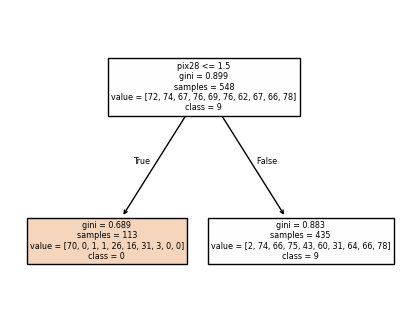

In [81]:
#
# we can get the individual trees, if we want...
#
tree_index = 28   # which tree
one_rf_tree = rforest_model.estimators_[tree_index]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'rf_tree_{tree_index:03d}.gv'             # f strings! Could save all trees, but we won't do so here.
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=FEATURES, # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=DIGITS,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")

with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)

#
# Treeing!
#
fig = plt.figure(figsize=(5,4))
tree_plot = tree.plot_tree(one_rf_tree,
                   feature_names=FEATURES,   # Glad to have these!
                   class_names=DIGITS,      # and these!!
                   filled=True)

In [82]:
#
# So, to compare different parameters, let's use cv
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

#
# lab task:  wrap this loop in another one! (or create an inner one...)
#

best_d = 1         # range(1,6)
best_ntrees = 50   # [50,150,250]
best_accuracy = 0

for d in range(1,6):
    for ntrees in [50,150,250]:
        rforest_model = ensemble.RandomForestClassifier(max_depth=d,
                                                        n_estimators=ntrees,
                                                        max_samples=0.5)
        cv_scores = cross_val_score( rforest_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy
            best_d = d
            best_ntrees = ntrees

#
# your task: assign best values by keeping a "running max"
#
best_depth = best_d
best_num_trees = best_ntrees

# This will be incorrect when initially run (you'll fix it):
print()
print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices. Acc: {best_accuracy}")

#
# remember that the RF lab task is to complete this nested cross-validation loop!
#

depth:  1 ntrees:  50 cv accuracy:  0.6450
depth:  1 ntrees: 150 cv accuracy:  0.6917
depth:  1 ntrees: 250 cv accuracy:  0.6889
depth:  2 ntrees:  50 cv accuracy:  0.8084
depth:  2 ntrees: 150 cv accuracy:  0.8289
depth:  2 ntrees: 250 cv accuracy:  0.8310
depth:  3 ntrees:  50 cv accuracy:  0.8649
depth:  3 ntrees: 150 cv accuracy:  0.8798
depth:  3 ntrees: 250 cv accuracy:  0.8876
depth:  4 ntrees:  50 cv accuracy:  0.9088
depth:  4 ntrees: 150 cv accuracy:  0.9229
depth:  4 ntrees: 250 cv accuracy:  0.9265
depth:  5 ntrees:  50 cv accuracy:  0.9314
depth:  5 ntrees: 150 cv accuracy:  0.9456
depth:  5 ntrees: 250 cv accuracy:  0.9455

best_depth: 5 and best_num_trees: 150 are our choices. Acc: 0.9455529659424103


In [83]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests
best_depth =  best_depth
best_num_trees = best_num_trees
# we should have best_depth and best_num_trees
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth,
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# we train the model (it's one line!)
rforest_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}")

Built an RF classifier with depth=5 and ntrees=150


In [84]:
#
# +++ This is our "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [8. 9. 1. 7. 1. 7. 3. 4. 0. 1. 5. 9. 4. 8. 5. 5. 5. 7. 4. 7. 6. 3. 4. 7.
 5. 1. 6. 4. 7. 6. 4. 9. 8. 0. 9. 9. 7. 4. 1. 1. 9. 6. 7. 7. 6. 5. 5. 4.
 6. 0. 4. 9. 8. 6. 6. 5. 8. 4. 1. 2. 5. 6. 1. 7. 5. 0. 8. 4. 3. 9. 1. 5.
 6. 4. 1. 1. 1. 7. 7. 1. 3. 3. 3. 3. 3. 3. 9. 8. 6. 4. 2. 0. 1. 5. 2. 1.
 7. 9. 1. 4. 8. 9. 1. 1. 1. 2. 9. 4. 4. 1. 3. 6. 2. 2. 5. 0. 6. 2. 6. 1.
 0. 2. 9. 6. 3. 3. 7. 1. 8. 7. 6. 6. 0. 0. 0. 5. 6. 3. 0. 8. 0. 5. 4. 0.
 8. 8. 3. 1. 1. 5. 2. 7. 6. 9. 7. 2. 2. 5. 7. 9. 3. 4. 4. 3. 5. 7. 6. 0.
 2. 2. 2. 3. 6. 7. 3. 0. 5. 7. 9. 6. 6. 2. 9. 3. 7. 2. 7. 0. 8. 2. 8. 4.
 7. 0. 8. 7. 5. 1. 4. 9. 4. 4. 9. 7. 4. 5. 7. 9. 1. 3. 5. 8. 3. 4. 4. 6.
 8. 2. 4. 2. 1. 5. 3. 0. 1. 4. 4. 2. 1. 4. 1. 0. 4. 8. 0. 7. 0. 7. 9. 0.
 8. 0. 6. 1. 9. 1. 0. 5. 4. 9. 1. 6. 1. 6. 0. 7. 3. 6. 1. 2. 9. 4. 1. 8.
 8. 8. 1. 9. 3. 3. 9. 6. 0. 1. 6. 4. 2. 6. 3. 9. 9. 1. 4. 8. 6. 8. 7. 1.
 4. 0. 9. 5. 4. 0. 6. 4. 4. 1. 9. 8. 6. 4. 4. 4. 2. 3. 6. 2. 0. 3. 0. 7.
 4. 5. 8. 5. 5. 6. 7. 9. 2. 0. 4.

326

In [85]:
#
# Ok!  We have tuned our RF to use the "best" parameters
#
# Now, we use ALL available data to train our final predictive model:
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

# we should have best_depth and best_num_trees
rforest_model_final = ensemble.RandomForestClassifier(max_depth=best_depth,
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# we train the model (it's one line!)
rforest_model_final.fit(X_all, y_all)              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}")

Built an RF classifier with depth=5 and ntrees=150


In [88]:
#
# final predictive model (random forests), with tuned parameters + ALL data incorporated
#

def predictive_model( Features, Model ):
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = Model.predict(our_features)       # The model's prediction!
    predicted_species = int(round(predicted_species[0]))  # unpack the extra brackets
    return predicted_species

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
# Features = [6.7,3.3,5.7,0.1]  # [5.8,2.7,4.1,1.0] [4.6,3.6,3.0,2.2] [6.7,3.3,5.7,2.1]

LoD = [[0,0,0,8,14,0,0,0,0,0,5,16,11,0,0,0,0,1,15,14,1,6,0,0,0,7,16,5,3,16,8,0,0,8,16,8,14,16,2,0,0,0,6,14,16,11,0,0,0,0,0,6,16,4,0,0,0,0,0,10,15,0,0,0],
[0,0,0,5,14,12,2,0,0,0,7,15,8,14,4,0,0,0,6,2,3,13,1,0,0,0,0,1,13,4,0,0,0,0,1,11,9,0,0,0,0,8,16,13,0,0,0,0,0,5,14,16,11,2,0,0,0,0,0,6,12,13,3,0],
[0,0,0,3,16,3,0,0,0,0,0,12,16,2,0,0,0,0,8,16,16,4,0,0,0,7,16,15,16,12,11,0,0,8,16,16,16,13,3,0,0,0,0,7,14,1,0,0,0,0,0,6,16,0,0,0,0,0,0,4,14,0,0,0],
[0,0,0,3,15,10,1,0,0,0,0,11,10,16,4,0,0,0,0,12,1,15,6,0,0,0,0,3,4,15,4,0,0,0,0,6,15,6,0,0,0,4,15,16,9,0,0,0,0,0,13,16,15,9,3,0,0,0,0,4,9,14,7,0],
[0,0,0,3,16,3,0,0,0,0,0,10,16,11,0,0,0,0,4,16,16,8,0,0,0,2,14,12,16,5,0,0,0,10,16,14,16,16,11,0,0,5,12,13,16,8,3,0,0,0,0,2,15,3,0,0,0,0,0,4,12,0,0,0],
[0,0,7,15,15,4,0,0,0,8,16,16,16,4,0,0,0,8,15,8,16,4,0,0,0,0,0,10,15,0,0,0,0,0,1,15,9,0,0,0,0,0,6,16,2,0,0,0,0,0,8,16,8,11,9,0,0,0,9,16,16,12,3,0]]



# run on each one:
for Features in LoD:
    predicted_species = predictive_model( Features, rforest_model_final )  # pass in the model, too!
    name = DIGITS[predicted_digits]
    print(f"I predict {name} from the features {Features}")    # Answers in the assignment...

I predict 2 from the features [0, 0, 0, 8, 14, 0, 0, 0, 0, 0, 5, 16, 11, 0, 0, 0, 0, 1, 15, 14, 1, 6, 0, 0, 0, 7, 16, 5, 3, 16, 8, 0, 0, 8, 16, 8, 14, 16, 2, 0, 0, 0, 6, 14, 16, 11, 0, 0, 0, 0, 0, 6, 16, 4, 0, 0, 0, 0, 0, 10, 15, 0, 0, 0]
I predict 2 from the features [0, 0, 0, 5, 14, 12, 2, 0, 0, 0, 7, 15, 8, 14, 4, 0, 0, 0, 6, 2, 3, 13, 1, 0, 0, 0, 0, 1, 13, 4, 0, 0, 0, 0, 1, 11, 9, 0, 0, 0, 0, 8, 16, 13, 0, 0, 0, 0, 0, 5, 14, 16, 11, 2, 0, 0, 0, 0, 0, 6, 12, 13, 3, 0]
I predict 2 from the features [0, 0, 0, 3, 16, 3, 0, 0, 0, 0, 0, 12, 16, 2, 0, 0, 0, 0, 8, 16, 16, 4, 0, 0, 0, 7, 16, 15, 16, 12, 11, 0, 0, 8, 16, 16, 16, 13, 3, 0, 0, 0, 0, 7, 14, 1, 0, 0, 0, 0, 0, 6, 16, 0, 0, 0, 0, 0, 0, 4, 14, 0, 0, 0]
I predict 2 from the features [0, 0, 0, 3, 15, 10, 1, 0, 0, 0, 0, 11, 10, 16, 4, 0, 0, 0, 0, 12, 1, 15, 6, 0, 0, 0, 0, 3, 4, 15, 4, 0, 0, 0, 0, 6, 15, 6, 0, 0, 0, 4, 15, 16, 9, 0, 0, 0, 0, 0, 13, 16, 15, 9, 3, 0, 0, 0, 0, 4, 9, 14, 7, 0]
I predict 2 from the features [0, 0, 0, 3, 16,

In [89]:
#
# feature importances are often even more "important" than predictions...
#
#    Random forests can provide a much "smoother" measure of feature importance, since
#                   they integrate over so many individual models (each tree)
#
#    That is, it's much less likely that a feature will have 0% importance, unless it never varies
#

print(rforest_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = rforest_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.00000000e+00 1.69769992e-03 1.83620189e-02 5.63534374e-03
 5.03437559e-03 1.85648545e-02 9.56240654e-03 1.64887179e-04
 0.00000000e+00 8.93300975e-03 2.44703928e-02 1.88332634e-03
 1.23183224e-02 3.12413554e-02 2.30880807e-03 2.99203288e-05
 0.00000000e+00 7.28327696e-03 1.49835480e-02 1.88132228e-02
 2.52303050e-02 6.39496701e-02 4.61228318e-03 1.05367457e-04
 0.00000000e+00 1.19343351e-02 5.21865899e-02 2.00289077e-02
 3.84646995e-02 2.08992527e-02 3.34154270e-02 0.00000000e+00
 0.00000000e+00 3.71085563e-02 3.02096225e-02 1.07247245e-02
 6.62650277e-02 1.49100085e-02 3.29577902e-02 0.00000000e+00
 2.75570989e-05 1.30177123e-02 4.05712174e-02 4.65477040e-02
 1.59984841e-02 1.42257868e-02 2.22375519e-02 7.65252184e-05
 0.00000000e+00 4.95556339e-04 1.25679118e-02 1.61344902e-02
 8.69981647e-03 2.20567368e-02 2.57767721e-02 2.01302878e-04
 0.00000000e+00 1.69878711e-03 2.15408938e-02 4.76843513e-03
 3.89791185e-02 2.85680875e-02 1.96337782e-02 1.88643768e-03]

Feature         pix0 h

<br>
<hr>
<br>

### Final task: &nbsp; _Visualizing_ pixel-importance:
+ using your best Random Forest model, find the 64 _relative feature importances_ for all 64 of the digits' pixels!
  + Show these as a list of 64 values (they will be difficult to imagine, but you will see that they vary a great deal, pixel-to-pixel)
+ Then, grab-and-adapt the code for visualizing individual digits in order to visualize the "importance image" of pixels...
+ that is, you'll create a heat map visualization, which is really just another image, of how relatively-important each of the 64 pixels is in your final Random Forest

This visualization will be a "low-res image" similar to the digits, ***but it won't itself be a digit***
+ Instead, it will show _how much_ each of the 64 spots, across all of the 8x8 grids in the dataset, contribute in classifying each digit...

In [107]:
#VIP just means a list for the importance for each pixels
VIP = []
# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    VIP.append(importance*100)

VIP

[np.float64(0.0),
 np.float64(0.1697699919044383),
 np.float64(1.8362018906610507),
 np.float64(0.5635343737141989),
 np.float64(0.5034375592675557),
 np.float64(1.8564854499328005),
 np.float64(0.9562406543715586),
 np.float64(0.01648871790145781),
 np.float64(0.0),
 np.float64(0.8933009750392995),
 np.float64(2.4470392836184947),
 np.float64(0.18833263394103358),
 np.float64(1.2318322427588484),
 np.float64(3.124135536808616),
 np.float64(0.2308808066745293),
 np.float64(0.002992032877157354),
 np.float64(0.0),
 np.float64(0.7283276964668001),
 np.float64(1.4983548040921042),
 np.float64(1.8813222846138167),
 np.float64(2.523030496354477),
 np.float64(6.394967008291222),
 np.float64(0.46122831758103916),
 np.float64(0.010536745671392733),
 np.float64(0.0),
 np.float64(1.1934335086008023),
 np.float64(5.218658992844029),
 np.float64(2.002890769325188),
 np.float64(3.84646995334304),
 np.float64(2.0899252690796946),
 np.float64(3.3415426951997484),
 np.float64(0.0),
 np.float64(0.0),
 

[np.float64(0.0), np.float64(0.1697699919044383), np.float64(1.8362018906610507), np.float64(0.5635343737141989), np.float64(0.5034375592675557), np.float64(1.8564854499328005), np.float64(0.9562406543715586), np.float64(0.01648871790145781), np.float64(0.0), np.float64(0.8933009750392995), np.float64(2.4470392836184947), np.float64(0.18833263394103358), np.float64(1.2318322427588484), np.float64(3.124135536808616), np.float64(0.2308808066745293), np.float64(0.002992032877157354), np.float64(0.0), np.float64(0.7283276964668001), np.float64(1.4983548040921042), np.float64(1.8813222846138167), np.float64(2.523030496354477), np.float64(6.394967008291222), np.float64(0.46122831758103916), np.float64(0.010536745671392733), np.float64(0.0), np.float64(1.1934335086008023), np.float64(5.218658992844029), np.float64(2.002890769325188), np.float64(3.84646995334304), np.float64(2.0899252690796946), np.float64(3.3415426951997484), np.float64(0.0), np.float64(0.0), np.float64(3.710855634473002), np

<Axes: >

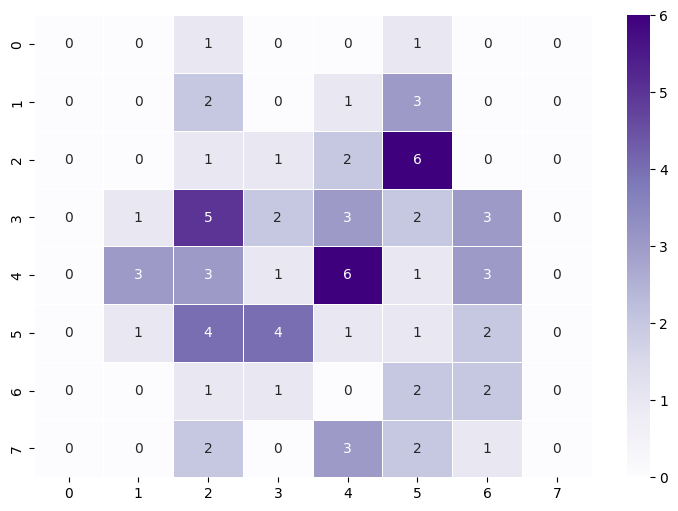

In [108]:


#
# Here is an example of using Seaborn to plot one of the 8x8 images
#      In this case, it's a list of 64 ints from 0 (most background) to 16 (most digit)
#


#
# Remember that, for the challenge above, you will want to visualize the feature importances...
#      You'll have to transform them so that this code can be applied...


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Python list :)
# PIXEL_VALUES = [0,0,0,5,14,12,2,0,0,0,7,15,8,14,4,0,0,0,6,2,3,13,1,0,0,0,0,1,13,4,0,0,0,0,1,11,9,0,0,0,0,8,16,13,0,0,0,0,0,5,14,16,11,2,0,0,0,0,0,6,12,13,3,0]

PIXEL_VALUES = VIP

# to Pandas dataframe :)
pixels = pd.DataFrame([PIXEL_VALUES])
print(PIXEL_VALUES)


# pixels = digits.iloc[row_to_show,0:64]  # shows how to grab this from within a larger dataframe named "digits"


# to Numpy array :)
pixels = pixels.values              # converts to numpy array
pixels = pixels.astype(int)         # convert to integers for plotting
pixels = np.reshape(pixels, (8,8))  # makes a series of 64 values into an 8x8 grid
print(f"Its pixels are\n{pixels}")


# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
# plot! Change annot=True to False to skip the numbers...


sns.heatmap(pixels, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="Purples")
# all seaborn palettes: medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
# cmap=None for reddish palette, cmap="Accent", cmap="gray_r" (best?), cmap="Purples", cmap="spam" to see the list...


Hummmm.... interesting...

In [ ]:
#
# That's it!  Welcome to the world of model-building workflows!!
#
#             Our prediction?  We'll be back for more ML!
#


# If you'd like, the EC is to run a DT/RF workflow on your own data...   (in hw6ec_modeler.ipynb)

